## Python statistics essential training - 04_02_confidenceintervals

Standard imports

In [7]:
import math
import io

In [8]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [9]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [10]:
poll = pd.read_csv('poll.csv')

In [11]:
poll.head()

,vote
0,Brown
1,Green
2,Brown
3,Brown
4,Brown


In [12]:
poll.vote.value_counts(normalize=True)

Brown    0.511
Green    0.489
Name: vote, dtype: float64

In [13]:
np.random.rand(5) < 0.51 # Random number is less than the true fraction we will get True and False for Brown and Green respectively.

array([ True,  True, False,  True, False])

In [14]:
# This function lets me generate a random sample set of 1000 data points for votes.
def sample(brown, n=1000):
    return pd.DataFrame({'vote':np.where(np.random.rand(n) < brown, 'Brown', 'Green')})

In [15]:
s = sample(0.51, n=1000)

In [18]:
s.vote.value_counts(normalize=True)
# Observation: In this sample Brown is under the level of winning the elections. However, his true fraction is 0.51.

Brown    0.523
Green    0.477
Name: vote, dtype: float64

In [19]:
# Here we are repeating the random sampling many times and collect the results in the DataFrame
# ie. In the below code we are executing 1000 simulated experiments for sampling.
dist = pd.DataFrame(sample(0.51).vote.value_counts(normalize=True) for _ in range(1000)) 
# Here we are sampling 1000 times and collecting only the fractions to asses true population fractions. To do this we plot a distribution curve.

In [25]:
dist.head()

,Brown,Green
vote,0.500,0.500
vote,0.503,0.497
vote,0.501,0.499
vote,0.508,0.492
vote,0.494,0.506


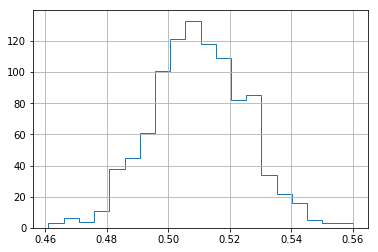

In [21]:
dist.Brown.hist(histtype='step', bins=20)# Observation: For a true brown fraction of 0.51 we may obtain any sample proportion from 0.48 to 0.55.

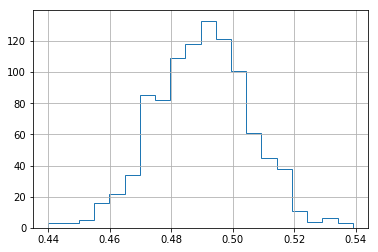

In [34]:
dist.Green.hist(histtype='step', bins=20)

In [37]:
dist.Green.describe()

count    1000.000000
mean        0.490100
std         0.015479
min         0.440000
25%         0.479750
50%         0.490000
75%         0.500000
max         0.539000
Name: Green, dtype: float64

In [44]:
dist.Green.median()

0.49

In [22]:
def samplingdist(brown, n=1000):
    return pd.DataFrame([sample(brown, n).vote.value_counts(normalize=True) for _ in range(1000)])

In [49]:
def quantiles(brown, n=1000):
    dist = samplingdist(brown, n)
    return dist.Brown.quantile(0.025), dist.Brown.quantile(0.975)

In [50]:
quantiles(0.51)

(0.478, 0.541)